## 5.5 Homework: 
Calculate the following integral based on three different rules

$$\int_0^3 (x^2-x+1 dx)$$

$$\int_0^3 (x^4-x+1 dx)$$

$$\int_0^3 \text{exp}(-x^2) dx$$

#### rectangle rule
$$\int_0^3 (x^2-x+1 dx)$$

<class 'int'>


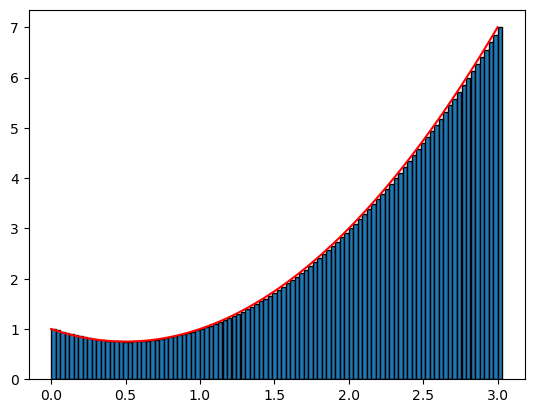

The Sum of the area is:  7.545454545454545


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rectangle(start, end, parts, plot=True):  
    #define the function
    f = lambda x: x**2-x+1
    
    #define the X,Y points
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts)
    resultsy = f(resultsx)
    
    #calculate the area
    area = np.empty([parts], float)  #1d array
    for i in range(parts):
        area[i] = resultsy[i] * deltax   

    #output the plot
    if plot==1:
        x = np.linspace(start,end,100)
        y = x**2-x+1        
        plt.plot(x, y, 'r')
        plt.bar(resultsx+deltax/2, resultsy, deltax, edgecolor ='black')
        plt.show()
        print("The Sum of the area is: ", sum(area))

rectangle(0,3,100)

#### trapezoidal rule

$$\int_0^3 (x^4-x+1 dx)$$

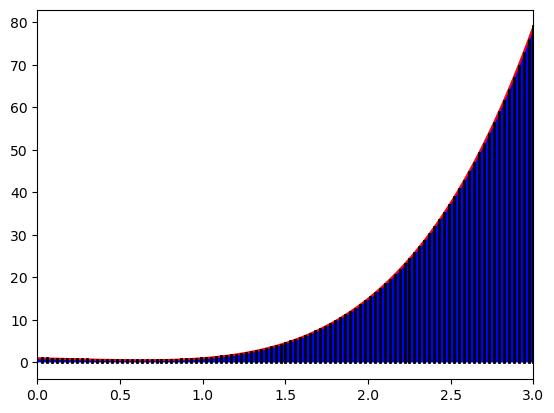

The Sum of the area is:  47.108099919


In [10]:
def trapezoid(start, end, parts, plot=True):  
    #define the function
    f = lambda x: x**4-x+1
    
    #define the X,Y points
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)
    
    #calculate the area
    area = np.empty([parts], float)  #1d array
    for i in range(parts):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2
    
    #output the plot
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        plt.xlim([start,end])
        
        y2 = np.array([0,0])
        for i in range(parts):
            x0 = resultsx[i:i+2]
            y1 = resultsy[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)        
        
        plt.show()
        print("The Sum of the area is: ", sum(area))

trapezoid(0,3,100)

#### Simpson's rule

$$\int_0^3 \text{exp}(-x^2) dx$$

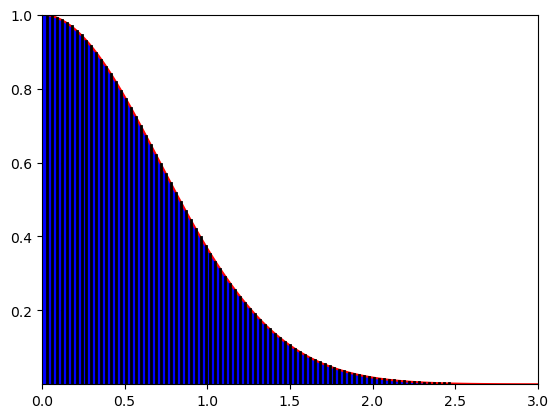

The Sum of the area is:  0.8862076460903081


In [20]:
def simpson(start, end, parts, plot=1):
    #define the function
    e = 2.71828
    f = lambda x: e**(-x**2)  
    
    #define the X, Y points 
    deltax = (end - start) / parts  #this is h in Simpson's rule formula
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    #calculate the area
    area = 0
    for i in range(0, parts, 2):  #each time, we choose 3 consec points
        area += 1/3*deltax*(resultsy[i]+4*resultsy[i+1]+resultsy[i+2])
    
    #output the plot
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r')
        
        y2 = [0]
        for i in range(parts):
            x0 = resultsx[i:i+3]
            y1 = resultsy[i:i+3]
            plt.fill_between(x0, y1, y2, facecolor='blue')
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)             
    
        plt.xlim([start,end])
        plt.ylim([min(y),max(y)])
        plt.show()
    return print("The Sum of the area is: ", area)
        
simpson(0,3,100)